In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) 

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, log_loss,roc_auc_score

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/sevilla hackathon/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/sevilla hackathon/Data/test.csv')
features=train.drop(['rating_num'], axis=1)
label=train['rating_num']
features.head(5)

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,winner,team1,8,7.0,7.0,0.317073,0.48,0.0,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,loser,team2,8,3.0,9.0,0.463415,0.42,0.0,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,loser,team1,5,11.0,11.0,0.682927,0.44,0.0,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,loser,team2,4,17.0,17.0,0.682927,0.58,0.0,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,draw,team1,5,10.0,10.0,0.731707,0.70,0.0,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


#Encoding

In [ ]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [ ]:
def three_encode(df, column, a_value,b_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 2 if x == a_value else (1 if x == b_value
                                  else 0))
    return df

In [ ]:
features= three_encode(features, 'winner', 'winner','draw')
features=binary_encode(features, "team","team1")
features.head(5)

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,1,13,2,1,8,7.0,7.0,0.317073,0.48,0.0,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,3,16,0,0,8,3.0,9.0,0.463415,0.42,0.0,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,4,0,1,5,11.0,11.0,0.682927,0.44,0.0,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,5,13,0,0,4,17.0,17.0,0.682927,0.58,0.0,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,7,11,1,1,5,10.0,10.0,0.731707,0.70,0.0,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500


In [ ]:
test= three_encode(test, 'winner', 'winner','draw')
test=binary_encode(test, "team","team1")
test.head(5)

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,14785,16,1,1,7.0,4.0,4.0,0.317073,0.44,0.0,...,0.268842,0.190509,0.311739,0.628642,0.405323,0.309039,0.114849,0.454992,0.304133,0.328816
1,15125,2,1,1,9.0,11.0,11.0,0.560976,0.60,0.0,...,0.346640,0.198072,0.246104,0.536949,0.486006,0.487637,0.105279,0.501402,0.381214,0.499620
2,13095,16,0,0,10.0,19.0,19.0,0.195122,0.30,0.0,...,0.351175,0.177065,0.262470,0.650741,0.567063,0.486774,0.062118,0.251021,0.586227,0.267774
3,6079,16,0,1,11.0,3.0,9.0,0.341463,0.30,0.0,...,0.496021,0.313902,0.405065,0.490855,0.591251,0.608131,0.294538,0.322264,0.685016,0.293783
4,16584,11,2,1,5.0,4.0,4.0,0.585366,0.70,0.2,...,0.396398,0.191068,0.042083,0.838704,0.689723,0.522480,0.090986,0.437002,0.476399,0.437500


#!! Start

In [ ]:
def rmissingvaluecol(dff,threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(dff.shape[1] - len(l)))
    print("Columns:\n",list(set(list((dff.columns.values))) - set(l)))
    return l

l=rmissingvaluecol(features,30)
df = features[l]

# Columns having more than 30 percent missing values: 135
Columns:
 ['player_other_ratio_var_26', 'player_other_ratio_var_28', 'team1_other_ratio_var_32', 'player_physical_derived_var_74', 'player_physical_derived_var_105', 'player_defensive_ratio_var_29', 'team2_other_raw_var_33', 'team2_other_ratio_var_33', 'player_other_ratio_var_31', 'player_offensive_ratio_var_72', 'team1_other_raw_var_72', 'player_physical_derived_var_5', 'player_other_ratio_var_23', 'player_physical_derived_var_23', 'player_general_raw_var_143', 'player_other_ratio_var_7', 'player_physical_raw_var_198', 'player_other_ratio_var_36', 'player_physical_derived_var_30', 'team1_other_ratio_var_42', 'player_physical_derived_var_35', 'player_physical_derived_var_70', 'player_physical_derived_var_34', 'player_other_ratio_var_25', 'player_physical_derived_var_107', 'team1_other_raw_var_92', 'player_offensive_ratio_var_57', 'player_offensive_ratio_var_70', 'player_other_ratio_var_73', 'team2_other_raw_var_31', 'team2_other

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
missing(df)

player_defensive_ratio_var_8     28.71
player_other_ratio_var_44        27.74
team2_other_ratio_var_10         27.11
team1_other_ratio_var_11         26.93
player_defensive_ratio_var_76    23.30
                                 ...  
player_general_var_2              0.00
player_general_var_3              0.00
player_general_var_4              0.00
scout_id                          0.00
row_id                            0.00
Length: 664, dtype: float64


In [ ]:
df.apply(lambda x: x.fillna(x.median(),inplace=True)) 

row_id                            None
scout_id                          None
winner                            None
team                              None
competitionId                     None
                                  ... 
team2_defensive_derived_var_15    None
team2_offensive_derived_var_16    None
team2_defensive_derived_var_17    None
team2_offensive_derived_var_18    None
team2_offensive_derived_var_19    None
Length: 664, dtype: object

#!! STOP

In [ ]:
#Check for  null values
df.isnull().sum()

row_id                            0
scout_id                          0
winner                            0
team                              0
competitionId                     0
                                 ..
team2_defensive_derived_var_15    0
team2_offensive_derived_var_16    0
team2_defensive_derived_var_17    0
team2_offensive_derived_var_18    0
team2_offensive_derived_var_19    0
Length: 664, dtype: int64

In [ ]:
test=test[l]
test.shape

(8774, 664)

In [ ]:
test.shape

(8774, 664)

In [ ]:
test = test.drop(columns=[col for col in df if col not in df.columns.values.tolist()])

In [ ]:
test.isnull().sum()

row_id                              0
scout_id                            0
winner                              0
team                                0
competitionId                       1
                                 ... 
team2_defensive_derived_var_15    416
team2_offensive_derived_var_16    416
team2_defensive_derived_var_17    416
team2_offensive_derived_var_18    416
team2_offensive_derived_var_19    416
Length: 664, dtype: int64

In [ ]:
test.apply(lambda x: x.fillna(x.median(),inplace=True)) 

row_id                            None
scout_id                          None
winner                            None
team                              None
competitionId                     None
                                  ... 
team2_defensive_derived_var_15    None
team2_offensive_derived_var_16    None
team2_defensive_derived_var_17    None
team2_offensive_derived_var_18    None
team2_offensive_derived_var_19    None
Length: 664, dtype: object

In [ ]:
test.isnull().sum()

row_id                            0
scout_id                          0
winner                            0
team                              0
competitionId                     0
                                 ..
team2_defensive_derived_var_15    0
team2_offensive_derived_var_16    0
team2_defensive_derived_var_17    0
team2_offensive_derived_var_18    0
team2_offensive_derived_var_19    0
Length: 664, dtype: int64

In [ ]:
#df= train.to_numpy()
# split data into input and output columns
#X, y = df[:, :-1], df[:, -1]

In [ ]:
# creating testing and training datasets
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size = 0.3)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

#!!

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)


#!!

# Feature Selection

Selecting all features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2,f_regression
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
#print(X_train_fs, X_test_fs, fs)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


Feature 0: 453.268453
Feature 1: 0.805572
Feature 2: 463.757589
Feature 3: 0.055923
Feature 4: 74.241906
Feature 5: 2.607882
Feature 6: 3.845737
Feature 7: 4.316230
Feature 8: 44.585675
Feature 9: 189.764964
Feature 10: 2.519536
Feature 11: 1.740331
Feature 12: 6.094168
Feature 13: 14.670854
Feature 14: 76.225395
Feature 15: 0.302964
Feature 16: 2.110273
Feature 17: 7.637373
Feature 18: 12.984107
Feature 19: 26.521343
Feature 20: 1.372587
Feature 21: 0.442845
Feature 22: 58.777326
Feature 23: 21.466437
Feature 24: 54.764647
Feature 25: 19.197506
Feature 26: 6.963256
Feature 27: 18.249038
Feature 28: 1.885120
Feature 29: 3.167180
Feature 30: 0.108778
Feature 31: 0.002603
Feature 32: 2.054491
Feature 33: 63.467553
Feature 34: 39.523135
Feature 35: 52.843176
Feature 36: 0.316419
Feature 37: 0.179585
Feature 38: 2.341013
Feature 39: 1.178533
Feature 40: 3.223089
Feature 41: 1.687745
Feature 42: 1.202807
Feature 43: 2.583047
Feature 44: 1.201452
Feature 45: 29.120735
Feature 46: 420.007512


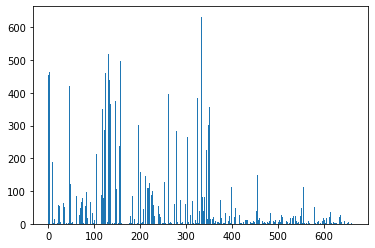

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
from matplotlib import pyplot
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Selecting using mutual information

Feature 0: 0.303669
Feature 1: 0.146087
Feature 2: 0.016397
Feature 3: 0.007995
Feature 4: 0.040507
Feature 5: 0.017494
Feature 6: 0.017375
Feature 7: 0.017440
Feature 8: 0.025333
Feature 9: 0.004752
Feature 10: 0.000000
Feature 11: 0.005073
Feature 12: 0.006243
Feature 13: 0.050335
Feature 14: 0.004643
Feature 15: 0.003975
Feature 16: 0.000000
Feature 17: 0.003465
Feature 18: 0.004479
Feature 19: 0.003665
Feature 20: 0.006150
Feature 21: 0.009798
Feature 22: 0.008896
Feature 23: 0.011419
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.001170
Feature 27: 0.007842
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.000000
Feature 31: 0.001654
Feature 32: 0.000000
Feature 33: 0.003237
Feature 34: 0.006555
Feature 35: 0.010393
Feature 36: 0.000000
Feature 37: 0.001236
Feature 38: 0.002234
Feature 39: 0.000000
Feature 40: 0.000000
Feature 41: 0.006236
Feature 42: 0.000000
Feature 43: 0.006159
Feature 44: 0.000000
Feature 45: 0.000000
Feature 46: 0.013901
Feature 47: 0.021843
Fe

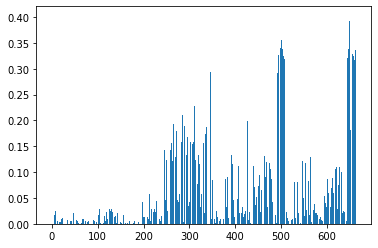

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_regression
...
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#Modelling


In [ ]:
#Model using all features
import xgboost
from xgboost import XGBRegressor
# create an xgboost regression model
model_0 = XGBRegressor(n_estimators=40, max_depth=5)#, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# define model evaluation method
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_0, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
scores


array([-1.24145127, -1.21167654, -1.16947837, -1.18718343, -1.21496247,
       -1.16288786, -1.20188624, -1.23495396, -1.22503476, -1.21132669,
       -1.23443946, -1.1702512 , -1.19067225, -1.23624307, -1.1990616 ,
       -1.21041403, -1.23390445, -1.1556063 , -1.21799948, -1.22152043,
       -1.2032351 , -1.19271044, -1.21847938, -1.1900891 , -1.21310198,
       -1.23702623, -1.25248593, -1.21885152, -1.14928129, -1.19460098])

In [ ]:
# feature selection function
def select_features(X_train, y_train, X_test, test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	Test_fs = fs.transform(test)
	return X_train_fs, X_test_fs, Test_fs, fs

MODEL 2

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
     params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'
              }
     #Cross validating with the specified parameters in 5 folds and 70 iterations
     dtrain = xgb.DMatrix(X_train_fs, label=y_train)
     dtest  = xgb.DMatrix(X_test_fs,label = y_test)
     cv_result = xgb.cv(params, dtrain, nfold=5)

     #Return the negative RMSE
     return -1.0 * cv_result['test-rmse-mean'].iloc[-1]
     #return -1.0 * valid_error


In [ ]:
from bayes_opt import BayesianOptimization
#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 5),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,600)
                                            })



In [ ]:
#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement

xgb_bo.maximize(n_iter=50, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -1.689    |  0.2513   |  0.3518   |  5.0      |  233.3    |
|  2        | -1.708    |  0.2484   |  0.6677   |  4.032    |  378.4    |
|  3        | -1.743    |  0.7607   |  0.8384   |  4.949    |  518.9    |
|  4        | -1.692    |  0.5633   |  0.4621   |  4.547    |  357.5    |
|  5        | -1.707    |  0.1416   |  0.3483   |  3.287    |  251.8    |
|  6        | -1.708    |  0.1251   |  0.8034   |  3.7      |  105.0    |
|  7        | -1.752    |  0.3814   |  0.9228   |  4.96     |  360.1    |
|  8        | -1.723    |  0.3418   |  0.7273   |  4.849    |  343.7    |
|  9        | -2.656    |  0.7341   |  0.1094   |  4.664    |  540.0    |
|  10       | -1.711    |  0.9234   |  0.6426   |  4.445    |  506.3    |
|  11       | -6.641    |  0.6582   |  0.0      |  3.0      |  393.9    |
|  12       | -1.87     |  0.3104   | 

In [ ]:
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])
params['objective'] = 'reg:squarederror'
params['early_stopping_rounds']= int(10)
params['num_rounds'] = int()
params['evals'] = xgb.DMatrix(X_test_fs, label=y_test)
#Initialize an XGBClassifier with the tuned parameters and fit the training data

from xgboost import XGBRegressor
# feature selection
X_train_fs, X_test_fs, Test_fs, fs = select_features(X_train, y_train, X_test, test)
model_2 = XGBRegressor(**params).fit(X_train_fs, y_train)



#predicting for training set
train_p2 = model_2.predict(X_train_fs)
test_p2  = model_2.predict(X_test_fs)

from sklearn.metrics import r2_score
#Looking at the classification report
print('train r2 score: ', r2_score(y_train, train_p2))
print('test r2 score: ', r2_score(y_test, test_p2))

{'gamma': 0.2512675064116262, 'learning_rate': 0.35180464729568084, 'max_depth': 4.99995042459272, 'n_estimators': 233.34983215294622}


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


train r2 score:  0.8021120969150277
test r2 score:  0.31341161923740546


In [ ]:
y_pred = model_2.predict(Test_fs)
y_pred

array([6.234896 , 5.4465737, 7.2114897, ..., 6.023382 , 4.567897 ,
       6.324657 ], dtype=float32)

In [ ]:
X_train_fs, X_test_fs, Test_fs, fs = select_features(df, label, X_test, test)
model_2 = XGBRegressor(**params).fit(X_train_fs,label)

y_pred = model_2.predict(Test_fs)
y_pred

array([7.0118513, 5.127671 , 6.7135406, ..., 5.9766283, 5.510972 ,
       7.3989882], dtype=float32)

In [ ]:
#predicting for training set
train_p2 = model_2.predict(X_train_fs)
score = r2_score(train_p2,label)
score

0.4935358461550192

In [ ]:
result = pd.DataFrame(y_pred,columns=['rating_num'], )
result['row_id']=test['row_id']
result=result[['row_id','rating_num']]
result

,row_id,rating_num
0,14785,7.011851
1,15125,5.127671
2,13095,6.713541
3,6079,7.074021
4,16584,5.938506
...,...,...
8769,21259,3.721888
8770,9371,8.017803
8771,23226,5.976628
8772,26623,5.510972


In [ ]:
result.to_csv('/content/drive/MyDrive/sevilla hackathon/SJ/solution2.csv',index=False)

MODEL 1


In [ ]:
#Model using above selected functions
from xgboost import XGBRegressor
# feature selection
X_train_fs, X_test_fs, Test_fs, fs = select_features(X_train, y_train, X_test,test)
# fit the model
model_1 = XGBRegressor( n_estimators=800, max_depth=13, objective = 'reg:squarederror')
model_1.fit(X_train_fs, y_train)

XGBRegressor(max_depth=13, n_estimators=800, objective='reg:squarederror')

In [ ]:
'''
import pickle
model_1.fit(df, label)
pickle.dump(model, open("model.pickle.dat", "wb"))
'''

'\nimport pickle\nmodel_1.fit(df, label)\npickle.dump(model, open("model.pickle.dat", "wb"))\n'

In [ ]:
yhat = model_1.predict(X_test_fs)
yhat

array([6.532622, 7.120703, 5.632578, ..., 8.217536, 6.042323, 6.862396],
      dtype=float32)

In [ ]:
 from sklearn.metrics import r2_score
 r2_score(y_test, yhat)

0.360517517248242

In [ ]:
y_pred = model_1.predict(Test_fs)
y_pred

array([7.616183 , 3.7988856, 5.053073 , ..., 5.8766875, 7.377419 ,
       7.51372  ], dtype=float32)

In [ ]:
Test_fs.shape

(8774, 664)

In [ ]:
result = pd.DataFrame(y_pred,columns=['rating_num'], )
result['row_id']=test['row_id']
result=result[['row_id','rating_num']]
result

,row_id,rating_num
0,14785,7.616183
1,15125,3.798886
2,13095,5.053073
3,6079,6.088090
4,16584,7.012094
...,...,...
8769,21259,4.826948
8770,9371,8.109484
8771,23226,5.876688
8772,26623,7.377419


In [ ]:
fs

SelectKBest(k='all', score_func=<function f_regression at 0x7ff8716c8320>)

In [ ]:
def round_nearest(x, a):
    return round(x / a) * a

In [ ]:
result['rating_num']=round_nearest(result['rating_num'],0.5)

In [ ]:
result

,row_id,rating_num
0,14785,7.616183
1,15125,3.798886
2,13095,5.053073
3,6079,6.088090
4,16584,7.012094
...,...,...
8769,21259,4.826948
8770,9371,8.109484
8771,23226,5.876688
8772,26623,7.377419


In [ ]:
result.to_csv('/content/drive/MyDrive/sevilla hackathon/SJ/solution2.csv',index=False)

In [2]:
!apt update
!apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

import re, pathlib, shutil

# Get a list of all your Notebooks
notebooks = [x for x in pathlib.Path("/content/drive/MyDrive/workshop").iterdir() if 
             re.search(r"\.ipynb", x.name, flags = re.I)]

for i, n in enumerate(notebooks):
    print(f"\nProcessing  [{i+1:{len(str(len(notebooks)))}d}/{len(notebooks)}]  {n.name}\n")

    # Optionally copy your notebooks from gdrive to your vm
    shutil.copy(n, n.name)
    n = pathlib.Path(n.name)

    !jupyter nbconvert "{n.as_posix()}" --to pdf --output "{n.stem.replace(" ", "_")}"

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.com/ubuntu 